In [1]:
import os
import sys

import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


sys.path.insert(0, '../Scripts')
from importlib import reload  
import From_Cairo_to_Shakti as lattices
reload(lattices)

<module 'From_Cairo_to_Shakti' from '../Scripts/From_Cairo_to_Shakti.py'>

# Topological charge

    In this script I will analyze the topological charge in a Cairo Lattice if we increse linearly up from 0 mT to 25 mT until 2000 s and then keeping the field constant until 2500s. Then we are Analyzing the output data of Script-8.2.

In [2]:
data_directory = "/media/Carol/Magnetic/Simulations/Cairo_lattice_PROJECT/Output_simulations/Output_Script-14.0"

In [3]:
#slope = 50/1500
#slope

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp37.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp7.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp24.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp28.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp47.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp30.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp12.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp42.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp35.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp5.0.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp0.0.dat
ACI_from_Cair

In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame id                                                             
0   0     0     -23.121096   23.121096             2       0 -0.366025   
          1      23.121096   23.121096             4       2 -1.732051   
          2     -23.121096  -23.121096             2      -2  1.366025   
          3      23.121096  -23.121096             4      -2  1.732051   
          4      69.363287   23.121096             4       0  2.732051   
...                    ...         ...           ...     ...       ...   
49  2500  1195  888.373762  832.359445             3       3  2.000000   
          1196  822.587320  786.117254             3      -1 -2.000000   
          1197  842.131570  786.117254             3      -1 -1.000000   
          1198  878.601637  795.889379             4       0  2.598076   
          1199  878.601637  776.345129             4       0  0.866025   

                      dy  
Exp frame id              
0   0     0     1.366025  
          1    -1.000000  
          2    -0.366025  
          3    -1.000000  
          4     0.732051  
...                  ...  
49  2500  1195  0.000000  
          1196  0.000000  
          1197  1.732051  
          1198 -1.500000  
          1199 -1.500000  

[15060000 rows x 6 columns]

Filtering out boundaries

In [8]:
theta = np.pi/6

First_frame = Cairo_exp.loc[0,0]

d = 13 # Interparticle distance
trap_sep_l = 10 # trap_sep parameter of the edge connecting 3 coordination and 4 coordination vertices
s_l4 = d*np.sqrt(2)/2

# <Generating lattice parameters depending on theta value>
trap_sep_a, s_l3, a, l, plaquette_cte = lattices.lattice_parameters(theta, d, trap_sep_l, s_l4)



92.48438280755889 786.1172538642505 46.242191403779444 739.8750624604711


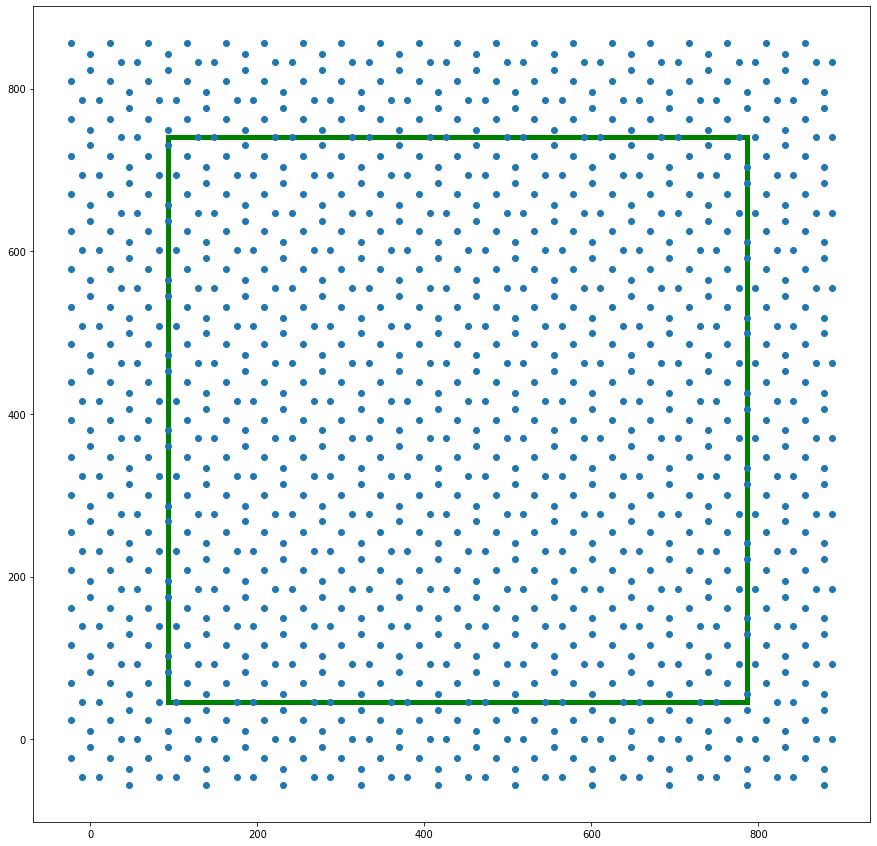

In [9]:
x_min = 2*plaquette_cte
y_min = plaquette_cte

width = plaquette_cte*15
hight = plaquette_cte*15

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

fig =plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

plt.plot(First_frame.x, First_frame.y , 'o')
ax.add_patch(Rectangle((x_min, y_min),width, hight,fc ='none', ec ='g',lw = 5))

In [10]:


Ca = Cairo_exp.loc[(Cairo_exp['x']<x_max) & (Cairo_exp['x']>x_min)]
Cairo_exp = Ca.loc[(Ca['y']<y_max) & (Ca['y']>y_min)]

In [11]:
Cairo_exp = Cairo_exp.query('coordination == 3 or coordination == 4')

In [12]:
Cairo_exp['time'] = (Cairo_exp.index.get_level_values('frame'))

## 1. Total topological charge

In [13]:
Topo_q = Cairo_exp.groupby('time').sum()/Cairo_exp.groupby('time').count()

In [14]:
Topo_q

,x,y,coordination,charge,dx,dy
time,,,,,,
0,439.300818,393.058627,3.348837,-0.000186,-0.010284,0.001361
10,439.300818,393.058627,3.348837,-0.000434,-0.011090,0.000927
20,439.300818,393.058627,3.348837,-0.000372,-0.010582,0.001882
30,439.300818,393.058627,3.348837,-0.000248,-0.010700,0.001933
40,439.300818,393.058627,3.348837,-0.000434,-0.012215,0.001429
...,...,...,...,...,...,...
2460,439.300818,393.058627,3.348837,0.002977,0.012583,0.001560
2470,439.300818,393.058627,3.348837,0.002791,0.011452,0.001858
2480,439.300818,393.058627,3.348837,0.001736,0.010585,-0.000139


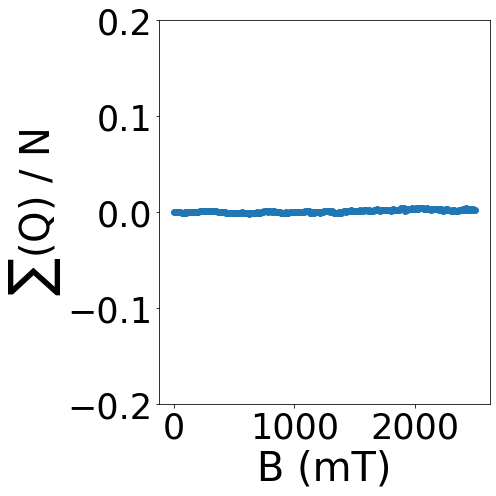

In [15]:
fig, ax1 = plt.subplots(figsize=(7,7))

plt.plot(Topo_q.index.get_level_values('time'), Topo_q.charge, 'o')

ax1.tick_params(axis='y', labelsize=35)
ax1.tick_params(axis='x', labelsize=35)  

ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('$\sum$(Q) / N', size = 40)
ax1.set_ylim(-0.2,0.2)

plt.tight_layout()

### 2. Total topological charge of each sublattice

In [16]:
Cairo_exp.groupby(['time','coordination']).sum()


x             y  charge          dx          dy
time coordination                                                            
0    3             9.225317e+06  8.254231e+06    -142 -166.257640   -0.110273
     4             4.942134e+06  4.421910e+06     136 -165.401233   44.014083
10   3             9.225317e+06  8.254231e+06    -150 -192.257640  -14.110273
     4             4.942134e+06  4.421910e+06     136 -165.401233   44.014083
20   3             9.225317e+06  8.254231e+06    -154 -181.061487    3.282032
...                         ...           ...     ...         ...         ...
2480 4             4.942134e+06  4.421910e+06    2164   98.458947  -57.961524
2490 3             9.225317e+06  8.254231e+06   -2012  263.406388  153.105118
     4             4.942134e+06  4.421910e+06    2102   77.353829   36.908965
2500 3             9.225317e+06  8.254231e+06   -2032   53.861561   95.091035
     4             4.942134e+06  4.421910e+06    2110 -118.190998  -39.784610

[502 rows x 5 columns]

In [17]:
df1 = Cairo_exp.groupby(['time','coordination']).sum()/Cairo_exp.groupby(['time','coordination']).count()


In [18]:
err = Cairo_exp.groupby(['time','coordination']).std()/np.sqrt(Cairo_exp.groupby(['time','coordination']).count())

In [19]:
df = df1['charge'].to_frame()
df['err'] = err['charge']

In [20]:
df

charge       err
time coordination                    
0    3            -0.006762  0.011996
     4             0.012089  0.018619
10   3            -0.007143  0.012000
     4             0.012089  0.018619
20   3            -0.007333  0.011990
...                     ...       ...
2480 4             0.192356  0.007169
2490 3            -0.095810  0.007027
     4             0.186844  0.007228
2500 3            -0.096762  0.007038
     4             0.187556  0.007204

[502 rows x 2 columns]

In [21]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "red", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

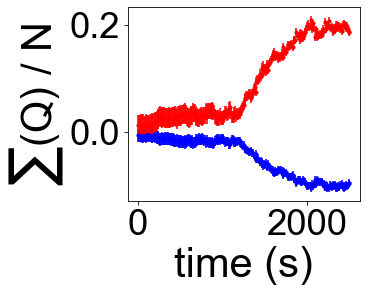

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

for typ_m, mtype in df.groupby('coordination'):
    
    plt.errorbar(mtype.index.get_level_values("time"), mtype["charge"],yerr = mtype['err'],fmt ='.', label = typ_m)
    #plt.plot(mtype.index.get_level_values("time"), mtype["charge"],'-', label = typ_m)

    
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35) 
#ax.legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax.set_xlabel('time (s)', size = 40)
ax.set_ylabel('$\sum$(Q) / N', size = 40)


plt.tight_layout()
#plt.savefig('ChargeTransfer_cairo_N=50.png', bbox_inches='tight')

In [23]:
def to_field(row):
    if row['sec'] < 2000:
        value = row['sec']*25/2000
    else:
        value = 25
    return value

df['sec'] = df.index.get_level_values('time')
df['mT'] = df.apply (lambda row: to_field(row) , axis=1)

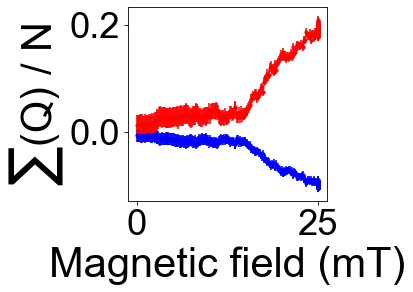

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

for typ_m, mtype in df.groupby('coordination'):
    
    plt.errorbar(mtype['mT'], mtype["charge"],yerr = mtype['err'],fmt ='.', label = typ_m)
    #plt.plot(mtype.index.get_level_values("time"), mtype["charge"],'-', label = typ_m)

    
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35) 
#ax.legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax.set_xlabel('Magnetic field (mT)', size = 40)
ax.set_ylabel('$\sum$(Q) / N', size = 40)


plt.tight_layout()

In [26]:
df.to_csv('ChargeTransfer_Cairo_N=50.dat', sep ='\t')